Aliasing
===========

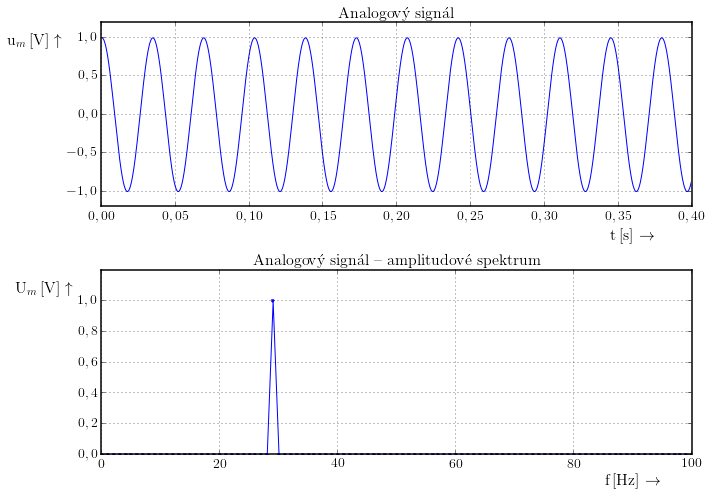

In [1]:
import matplotlib.patches as mpp
from scipy.fftpack import fft, ifft
##########################################3

#  Konstanty
fs=8000
Ts=1./fs
length=1


# časová osa
t = arange(0,length,1./fs)
u = 1*cos(2*pi*29*t)

# Spektrum    
Ck= fft(u)
absCk = 2./len(u) * numpy.abs(Ck)[:len(Ck)/2]
f = arange(0,fs/2,float(fs)/len(Ck))
    
# analogový signál
fig=figure()
subplot(211)
plot(t,u)
title(u'Analogový signál')
grid('on')
xlabel(r't\,[s] $\rightarrow$', x=0.9)
ylabel('$\mathrm u_m$\,[V] $\uparrow$', y=0.9, rotation=0)
ylim([-1.2, 1.2])
xlim([0,0.4])

subplot(212)
title(ur'Analogový signál -- amplitudové spektrum')
plot(f,absCk,'.-')
xlabel(r'f\,[Hz] $\rightarrow$', x=0.9)
ylabel('$\mathrm U_m$\,[V] $\uparrow$', y=0.9, rotation=0)
xlim([0,100])
ylim([0,1.2])
grid(1)
#text(500,-0.2 , '$\mathbf{f_m}$', size=16)
#figtext(0,1 , '$\mathrm f_m$', size=16)
tight_layout()

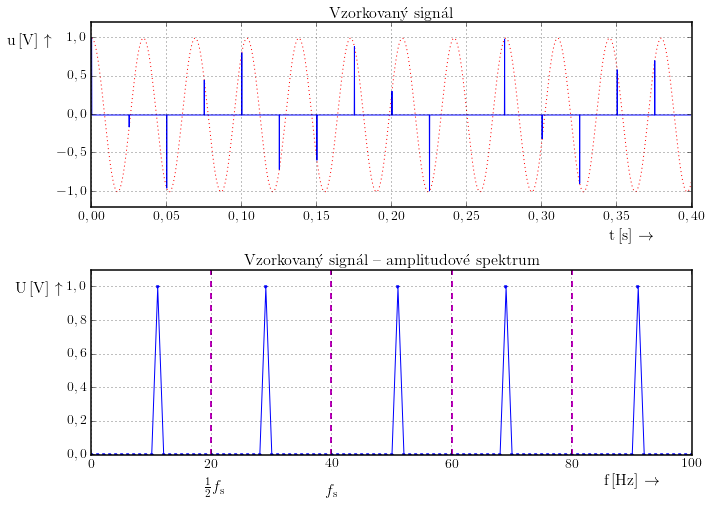

In [2]:
faktor=200 # kolikrát je vzorkovácí frekvence menší než fs

# jehlový vzorek
uvz=u.copy()
for i,data in enumerate(uvz):
    if i%faktor!=0:
        uvz[i]=0
Svz= fft(uvz)
absSvz =2.*faktor/len(uvz) * numpy.abs(Svz)[:len(Svz)/2]

# Modulační signá
fig=figure()
subplot(211)
plot(t,u,':r',label=u'původní signál')
#stem(t[::faktor], uvz[::faktor],'b-','ro','x')
plot(t,uvz,label=u'navzorkovaný signál')
title(u'Vzorkovaný signál')
grid('on')
xlabel(r't\,[s] $\rightarrow$', x=0.9)
ylabel('$\mathrm u$\,[V] $\uparrow$', y=0.9, rotation=0)
ylim([-1.2,1.2])
xlim([0,0.4])


subplot(212)
title(ur'Vzorkovaný signál -- amplitudové spektrum')

plot(f,absSvz,'b.-',label=u'navzorkovaný signál' )
xlabel(r'f\,[Hz] $\rightarrow$', x=0.9)
ylabel('$\mathrm U$\,[V] $\uparrow$', y=0.9, rotation=0)
ylim([0,1.1*max(absCk)]);
xlim([0,100])
grid(1)
#legend()

axvline(20, linestyle='--', linewidth=2, color='m')
axvline(40, linestyle='--', linewidth=2, color='m')
axvline(60, linestyle='--', linewidth=2, color='m')
axvline(80, linestyle='--', linewidth=2, color='m')
text(19,-0.25 , '${1\over 2}f_\mathrm{s}$', size=16)
text(39,-0.25 , '$f_\mathrm{s}$', size=16)
#figtext(0,1 , '$\mathrm f_m$', size=16)
tight_layout()

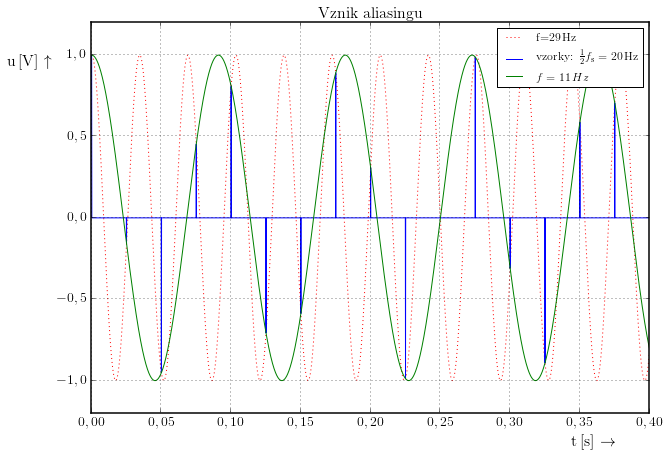

In [3]:
figure()
subplot(111)

plot(t,u,':r',label=ur'f=29\,Hz')
plot(t,uvz,label=ur'vzorky: ${1\over 2 }f_\mathrm{s}=20\,\mathrm{Hz}$')
plot(t,cos(2*pi*11*t),label=ur'$f=11\,Hz$')

title(u'Vznik aliasingu')
grid('on')
xlabel(r't\,[s] $\rightarrow$', x=0.9)
ylabel('$\mathrm u$\,[V] $\uparrow$', y=0.9, rotation=0)
ylim([-1.2,1.2])
xlim([0,0.4])
legend()


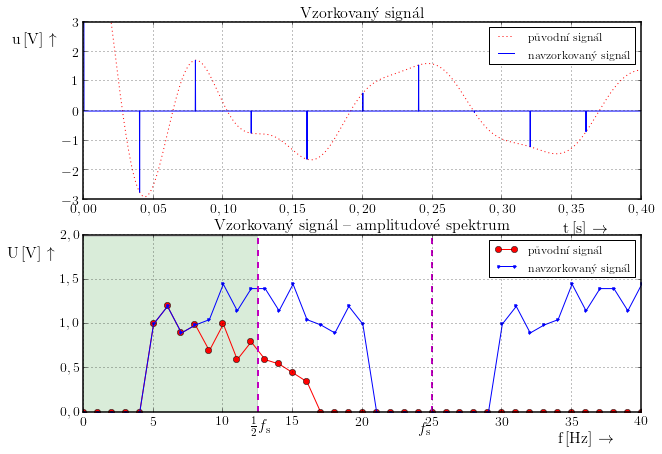

In [4]:
fmin=5.
Tmin=1./fmin
# časová osa
t = arange(0,length,1./fs)
u = 1*sin(2*pi*5*t)+1.2*sin(2*pi*6*t)+0.9*cos(2*pi*7*t)+\
    0.99*cos(2*pi*8*t)+0.7*cos(2*pi*9*t)+1*cos(2*pi*10*t)+\
    0.6*cos(2*pi*11*t)+0.8*cos(2*pi*12*t)+0.6*cos(2*pi*13*t)+\
    0.55*cos(2*pi*14*t)+0.45*cos(2*pi*15*t)+0.35*cos(2*pi*16*t)



faktor=320 # kolikrát je vzorkovácí frekvence menší než fs

# jehlový vzorek
uj=u.copy()
for i,data in enumerate(uj):
    if i%faktor!=0:
        uj[i]=0
Sj= fft(uj)
absSj =2.*faktor/len(uj) * numpy.abs(Sj)[:len(Sj)/2]

#různě široký vzorek
uvz=u.copy()
zmena=False
for i,data in enumerate(uvz):
    sirka = 1 # šířka vzorkovacího impulzu
    if i%faktor==0:
        continue
    for s in range(1,sirka):
        if ((i-s)%faktor)==0:
            uvz[i] = uvz[i-s]
            zmena = True
    if not zmena :     
        uvz[i]=0
    zmena = False

## Spektrum
P= fft(u)
absP =2./len(u)/sirka * numpy.abs(P)[:len(P)/2]

Svz= fft(uvz)
absSvz =2.*faktor/len(uvz)/sirka * numpy.abs(Svz)[:len(Svz)/2]


fig=figure()
subplot(211)
plot(t,u,':r',label=u'původní signál')
#stem(t[::faktor], uvz[::faktor],'b-','ro','x')
plot(t,uvz,label=u'navzorkovaný signál')
title(u'Vzorkovaný signál')
grid('on')
xlabel(r't\,[s] $\rightarrow$', x=0.9)
ylabel('$\mathrm u$\,[V] $\uparrow$', y=0.9, rotation=0)
ylim([-3,3])
xlim([0,2*Tmin])
legend()

subplot(212)
title(ur'Vzorkovaný signál -- amplitudové spektrum')
plot(f,absP,'ro-', label=u'původní signál')
plot(f,absSvz,'b.-',label=u'navzorkovaný signál' )
xlabel(r'f\,[Hz] $\rightarrow$', x=0.9)
ylabel('$\mathrm U$\,[V] $\uparrow$', y=0.9, rotation=0)
ylim([0,2*max(absCk)]);
xlim([0,40])
grid(1)
legend()

axvline(12.5, linestyle='--', linewidth=2, color='m')
axvline(25, linestyle='--', linewidth=2, color='m')
#axvline(37.5, linestyle='--', linewidth=2, color='m')
#axvline(50, linestyle='--', linewidth=2, color='m')
text(12,-0.25 , r'${1\over 2}f_\mathrm{s}$', size=16)
text(24,-0.25 , r'$f_\mathrm{s}$', size=16)
#figtext(0,1 , '$\mathrm f_m$', size=16)

axvspan(0, 12.5, facecolor='g', alpha=0.15, ymin=0, ymax=.99)


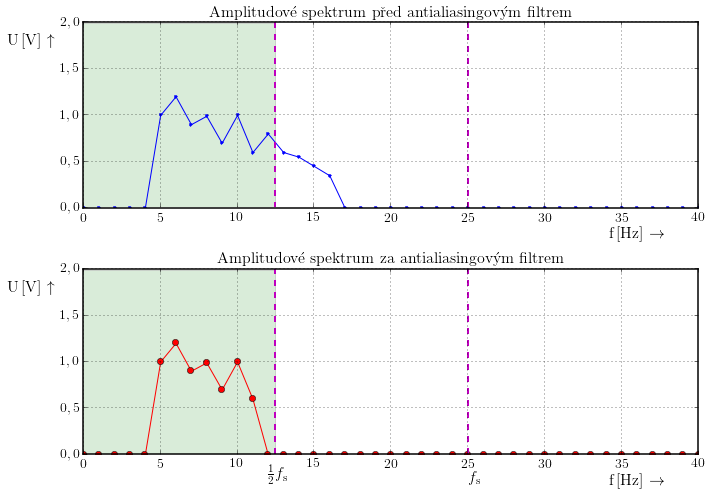

In [5]:
fmin=5.
Tmin=1./fmin
# časová osa
t = arange(0,length,1./fs)
u = 1*sin(2*pi*5*t)+1.2*sin(2*pi*6*t)+0.9*cos(2*pi*7*t)+\
    0.99*cos(2*pi*8*t)+0.7*cos(2*pi*9*t)+1*cos(2*pi*10*t)+\
    0.6*cos(2*pi*11*t)+0.8*cos(2*pi*12*t)+0.6*cos(2*pi*13*t)+\
    0.55*cos(2*pi*14*t)+0.45*cos(2*pi*15*t)+0.35*cos(2*pi*16*t)
p = 1*sin(2*pi*5*t)+1.2*sin(2*pi*6*t)+0.9*cos(2*pi*7*t)+\
    0.99*cos(2*pi*8*t)+0.7*cos(2*pi*9*t)+1*cos(2*pi*10*t)+\
    0.6*cos(2*pi*11*t)


## Spektrum
P= fft(p)
absP =2./len(u)/sirka * numpy.abs(P)[:len(P)/2]

Svz= fft(u)
absSvz =2./len(uvz)/sirka * numpy.abs(Svz)[:len(Svz)/2]


fig=figure()
subplot(211)
title(ur'Amplitudové spektrum před antialiasingovým filtrem')
plot(f,absSvz,'b.-',label=u'navzorkovaný signál' )
xlabel(r'f\,[Hz] $\rightarrow$', x=0.9)
ylabel('$\mathrm U$\,[V] $\uparrow$', y=0.9, rotation=0)
ylim([0,2*max(absCk)]);
xlim([0,40])
grid(1)
#legend()
axvline(12.5, linestyle='--', linewidth=2, color='m')
axvline(25, linestyle='--', linewidth=2, color='m')
axvspan(0, 12.5, facecolor='g', alpha=0.15, ymin=0, ymax=.99)

subplot(212)
title(ur'Amplitudové spektrum za antialiasingovým filtrem')
plot(f,absP,'ro-', label=u'původní signál')
xlabel(r'f\,[Hz] $\rightarrow$', x=0.9)
ylabel('$\mathrm U$\,[V] $\uparrow$', y=0.9, rotation=0)
ylim([0,2*max(absCk)]);
xlim([0,40])
grid(1)
#legend()

axvline(12.5, linestyle='--', linewidth=2, color='m')
axvline(25, linestyle='--', linewidth=2, color='m')
#axvline(37.5, linestyle='--', linewidth=2, color='m')
#axvline(50, linestyle='--', linewidth=2, color='m')
text(12,-0.31 , r'${1\over 2}f_\mathrm{s}$', size=16)
text(25,-0.31 , r'$f_\mathrm{s}$', size=16)
#figtext(0,1 , '$\mathrm f_m$', size=16)

axvspan(0, 12.5, facecolor='g', alpha=0.15, ymin=0, ymax=.99)

tight_layout()